## Efficient Frontier Part II

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import edhec_risk_kit as erk


In [3]:
ind = erk.get_ind_returns()
er = erk.annualized_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

Let's start by generating all the points in the volatility-return plane as a function of the weights we give to each asset. First of all, let's check that the functions we have created to obtain the portfolio return and volatility work:

In [13]:
sel_ind = ["Food","Beer","Smoke","Coal"]

sel_cov = cov.loc[sel_ind,sel_ind] #returns the combinations of those rows and columns

sel_cov

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [8]:
weights = np.repeat(1/4,4)  #array of 4 entries, all of them 1/4

In [11]:
erk.portfolio_return(weights,er[["Food","Beer","Smoke","Coal"]])

0.19511097196038385

In [14]:
erk.portfolio_vol(weights,sel_cov)

0.05505919577643704

### 2 Asset Frontier

Since we are working with two assets, it is easy to study the efficient frontier, as we only have two weights with values w and 1-w. 2 assets do not require much computations, so we will study 1000 weight combinations. Those should be more than enough to see the efficient frontier.

In [16]:
n_points = 1000

weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_points)]




Let's study Games and Finance industry. In order to do this, we need the portfoio return and volatility for all the weight combinations we calculated above:

In [24]:
rets = [erk.portfolio_return(w,er[["Games","Fin"]]) for w in weights]
vols = [erk.portfolio_vol(w,cov.loc[["Games","Fin"],["Games","Fin"]]) for w in weights]
ef_data = pd.DataFrame({"Returns":rets,"Volatility": vols})

Now that we have the returns and volatilities, we can proceed to plot the efficient frontier.

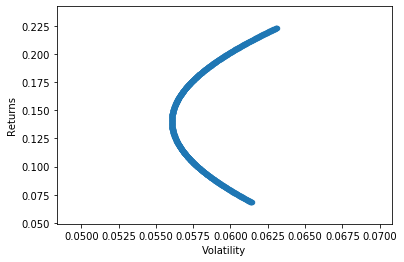

In [26]:
ef_data.plot.scatter(x="Volatility",y = "Returns")

In order to make things simpler, we have created a function called plot_ef2, which basically does what we've seen:

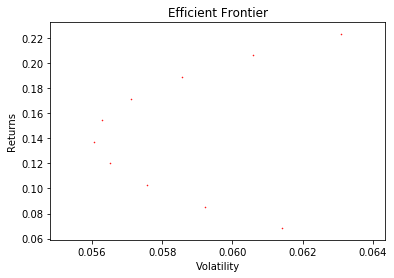

In [51]:
erk.plot_ef2(10,er[["Games","Fin"]],cov.loc[["Games","Fin"],["Games","Fin"]])